<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 19-3-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 31-3-2023, 23:59:59
<h1><center>Άσκηση 3 [Προαιρετική]</center></h1>

In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import numpy as np
%matplotlib inline

Η άσκηση αυτή αποτελεί συνέχεια της προηγούμενης άσκησης Python σχετικά με παθολογία φωνής και χρησιμοποιεί τις βασικές έννοιες ανάλυσης της 1ης άσκησης Python. 

Ίσως να σκεφτήκατε ότι αυτό που κάναμε στην προηγούμενη άσκηση, δηλ. το να πάρουμε ένα τυχαίο κομμάτι απ΄ το σήμα φωνής μας και αφού το αναλύσουμε, να βγάλουμε απόφαση για κάτι τόσο σοβαρό όπως μια πιθανή παθολογία, είναι λίγο ριψοκίνδυνο και επιπόλαιο. Κάτι πιο ασφαλές θα ήταν το εξής:

---
---

## Άσκηση:

$\left(\alpha'\right)$ Χωρίστε όλο το σήμα σε παράθυρα διάρκειας $50$ ms, με μια επικάλυψη γειτονικών παραθύρων της τάξης του $50\%$, δηλ. ‘‘προχωράτε’’ το παράθυρό σας πάνω στο σήμα της φωνής κάθε $25$ ms, ώστε τα παράθυρά σας να επικαλύπτονται κατά μισό παράθυρο.

Αυτό μπορείτε να το κάνετε με χρήση βρόχων επανάληψης όπως τους γνωρίζετε από τη C (for, while) - δε διαφέρουν πολύ. Γράψτε help for, help while για να δείτε πως συντάσσονται. Σκεφτείτε οτι απλά πρέπει να διατρέχετε ένα πίνακα-γραμμή (που είναι το σήμα σας) ανά κάποιο αριθμό στοιχείων.

$\left(\beta'\right)$ Υπολογίστε τον μετασχηματισμό Fourier για τις συχνότητες $2000−4000$ Hz με ανάλυση $Df = 1$ Hz, και βρείτε το φάσμα πλάτους του κάθε παραθύρου. Αποθηκεύστε το φάσμα πλάτους κάθε παραθύρου σε μια γραμμή ενός πίνακα $X$. Αυτό μπορεί να γίνει ως εξής (**ο παρακάτω κώδικας *δεν* είναι εκτελέσιμος, σας δίνεται ως βοήθεια για παρακάτω**):

$\left(\gamma'\right)$ Να υπολογίσετε το "**μέσο φάσμα πλάτους**", δηλ. μια μέση τιμή όλων των φασμάτων πλάτους που έχετε βρει, έτσι ώστε στο τέλος να έχουμε μόνο ένα φάσμα πλάτους, και να αποφασίσετε για την παθολογία βάσει αυτού. Χρήσιμη θα σας φανεί η εντολή $\texttt{mean}$ της $\texttt{NumPy}$.

Ακολουθώντας μια τέτοια διαδικασία έχουμε πιο εύρωστα, με τη στατιστική έννοια, συμπεράσματα.

## Απάντηση:

Ας φορτώσουμε το σήμα μας.

In [2]:
Fs, s = wav.read('alpha.wav')        # Φορτώστε το αρχείο ήχου
s = s / np.abs(np.max(s))            # Κανονικοποίηση
L = len(s)                           # Διάρκεια του σήματος σε δείγματα

Ας ορίσουμε τις παραμέτρους της ανάλυσής μας.

In [3]:
winlen_ms = 50e-3 # ms               # Έστω ότι το παράθυρό μας είναι 50 ms
winlen = int(winlen_ms * Fs)              # Η διάρκειά του σε δείγματα
overlap = int(winlen/2)              # Επικάλυψη κατά 50% των διαδοχικών παραθύρων

Ας ξεκινήσουμε τη διαδικασία που περιγράψαμε παραπάνω.

In [4]:
Df = 1
f = np.arange(start=2000, stop=4000, step=Df)        # Άξονας συχν΄ότητας

ff = np.expand_dims(f, axis=0)                       # Επέκταση διάστασης όπως αναφέραμε στην 1η άσκηση Python
t = np.arange(start=0, stop=winlen_ms, step=1/Fs)    # Άξονας χρόνου για ένα παράθυρο διάρκειας 50ms
tt = np.expand_dims(t, axis=0)                       # Επέκταση διάστασης όπως αναφέραμε στην 1η άσκηση Python

N = int((L - winlen)/overlap)                  # Πλήθος frames που υπάρχουν στο σήμα μας
Y = np.zeros(shape=(N, len(f)))                # Δ΄έσμευση μνήμης (όπως η calloc στη C)

for i in range(N):                          # Βρόχος επανάληψης που διατρέχει τα frames του σήματος
    start = i*overlap               # Έναρξη παραθύρου - χρησιμοποιήστε τη μεταβλητή overlap και το δείκτη i
    stop = i*overlap + winlen                  # Τέλος παραθύρου
    segment = s[int(start) : int(stop)]      # Αποκόπτουμε από το συνολικό σήμα s το κομμάτι που μας ενδιαφέρει -κάντε χρήση                                      # των start και stop στο διάνυσμα s, θυμηθείτε πώς κάνουμε slicing ένα array
    M = np.exp(-1j * 2 * np.pi * ff.T @ tt)         # Πίνακας αναλυσης M(f,t)

    MF = (1/Fs) * segment @ M.T                # Μετασχ. Fourier (όπως τον δείξαμε στην 1η άσκηση Python της σειράς αυτής)
    
    Y[i, :] = np.abs(MF)                       # Συλλέγουμε τα φάσματα πλάτους στον πίνακα Y, ένα σε κάθε θέση i του πίνακα

Έχοντας μαζέψει όλα τα φάσματα πλάτους στον πίνακα Υ, ένα φάσμα σε κάθε γραμμή του, μπορούμε να υπολογίσουμε τη μέση τιμή όλων των φασμάτων πλάτους!

Text(0.5, 1.0, 'Μέσο Φάσμα Πλάτους')

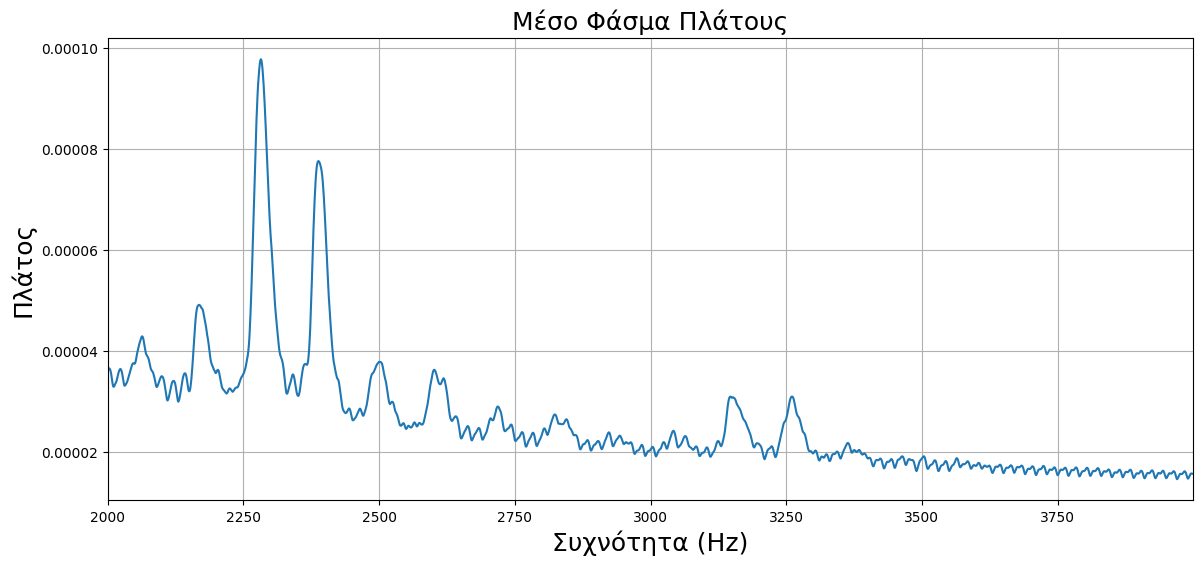

In [5]:
meanY = np.mean(Y, axis=0)                     # Υπολογίζουμε τη μέση τιμή των φασμάτων πλάτους - χρησιμοποιήστε την np.mean()

plt.figure(figsize=(14,6))                     # Απεικόνιση
plt.plot(f, meanY)                             # Γράφημα
plt.xlim([f[0], f[-1]])
plt.grid()
plt.xlabel("Συχνότητα (Hz)", fontsize=18)      # Ομορφαίνουμε
plt.ylabel("Πλάτος", fontsize=18)              # Ομορφαίνουμε
plt.title('Μέσο Φάσμα Πλάτους', fontsize=18)   # Ομορφαίνουμε

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.